# Please scroll down to "Part 3 of Week 3 Assignment"

<a id='part 1'></a>
# Part 1 of Week 3 Assignment
Below is my code for the first part of this week's assignment. 
Here are some features of what I did:
1. Used requests and beautiful soup modules to pull the HTML down from the wikipedia site and work with the table data.
2. Created for loops to extract the data from the table and create the dataframe
3. Once the dataframe was compiled I performed some steps to format the data properly

In [1]:
#import the libraries needed
import requests
import pandas as pd
from bs4 import BeautifulSoup

#1. lets screpe out the table and seperate the table body:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.text, 'lxml')
table = soup.find_all('table')[0] 

#2. now to set up the header row and then pull out the actual table row data
header = []    
for th in table.findAll('th'):
    key = th.get_text()
    key = key.strip() #added to clean the values, I was getting an unwanted \n at the end of the last word.
    header.append(key)

table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    row = [elem.rstrip() for elem in row] #also added to remove the trailing \n
    l.append(row)
    
#now to combine the 2 lists into a dataframe leaving off the first list in l since that's the header row and shows as empty
df=pd.DataFrame(l[1:], columns=header)

#3. clean up the values to format the data per instructions
df=df[df.Borough !='Not assigned']
df=df.reset_index(drop=True)
df=df.replace({'Neighbourhood':'Not assigned'},{'Neighbourhood':df['Borough']})
df=df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df


Postcode           Borough  \
0        M1B       Scarborough   
1        M1C       Scarborough   
2        M1E       Scarborough   
3        M1G       Scarborough   
4        M1H       Scarborough   
5        M1J       Scarborough   
6        M1K       Scarborough   
7        M1L       Scarborough   
8        M1M       Scarborough   
9        M1N       Scarborough   
10       M1P       Scarborough   
11       M1R       Scarborough   
12       M1S       Scarborough   
13       M1T       Scarborough   
14       M1V       Scarborough   
15       M1W       Scarborough   
16       M1X       Scarborough   
17       M2H        North York   
18       M2J        North York   
19       M2K        North York   
20       M2L        North York   
21       M2M        North York   
22       M2N        North York   
23       M2P        North York   
24       M2R        North York   
25       M3A        North York   
26       M3B        North York   
27       M3C        North York   
28       M3H        North York   
29       M3J        North York   
..       ...               ...   
73       M6C              York   
74       M6E              York   
75       M6G  Downtown Toronto   
76       M6H      West Toronto   
77       M6J      West Toronto   
78       M6K      West Toronto   
79       M6L        North York   
80       M6M              York   
81       M6N              York   
82       M6P      West Toronto   
83       M6R      West Toronto   
84       M6S      West Toronto   
85       M7A      Queen's Park   
86       M7R       Mississauga   
87       M7Y      East Toronto   
88       M8V         Etobicoke   
89       M8W         Etobicoke   
90       M8X         Etobicoke   
91       M8Y         Etobicoke   
92       M8Z         Etobicoke   
93       M9A      Queen's Park   
94       M9B         Etobicoke   
95       M9C         Etobicoke   
96       M9L        North York   
97       M9M        North York   
98       M9N              York   
99       M9P         Etobicoke   
100      M9R         Etobicoke   
101      M9V         Etobicoke   
102      M9W         Etobicoke   

                                         Neighbourhood  
0                                       Rouge, Malvern  
1               Highland Creek, Rouge Hill, Port Union  
2                    Guildwood, Morningside, West Hill  
3                                               Woburn  
4                                            Cedarbrae  
5                                  Scarborough Village  
6          East Birchmount Park, Ionview, Kennedy Park  
7                      Clairlea, Golden Mile, Oakridge  
8      Cliffcrest, Cliffside, Scarborough Village West  
9                          Birch Cliff, Cliffside West  
10   Dorset Park, Scarborough Town Centre, Wexford ...  
11                                   Maryvale, Wexford  
12                                           Agincourt  
13             Clarks Corners, Sullivan, Tam O'Shanter  
14   Agincourt North, L'Amoreaux East, Milliken, St...  
15                                     L'Amoreaux West  
16                                         Upper Rouge  
17                                   Hillcrest Village  
18                        Fairview, Henry Farm, Oriole  
19                                     Bayview Village  
20                            Silver Hills, York Mills  
21                             Newtonbrook, Willowdale  
22                                    Willowdale South  
23                                     York Mills West  
24                                     Willowdale West  
25                                           Parkwoods  
26                                     Don Mills North  
27                    Flemingdon Park, Don Mills South  
28     Bathurst Manor, Downsview North, Wilson Heights  
29                     Northwood Park, York University  
..                                                 ...  
73                                  Humewood-Cedarvale  
74            

In [2]:
print(df.shape)

(103, 3)


<a id='part 2'></a>
# Part 2 of week 3 assignment


In [3]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 11.4MB/s ta 0:00:01


In [4]:
df_2 = df.copy()#copy our df just to seperate from part 1.

#After wasting several hours trying to run the geocoder and finding that the kernal ran for hours with no results I decided to go with plan B and use the csv file
url="https://cocl.us/Geospatial_data"
c=pd.read_csv(url)

c.rename(columns={'Postal Code': 'Postcode'}, inplace=True)

df_3 = pd.merge(df_2,
                 c[['Postcode', 'Latitude', 'Longitude']],
                 on='Postcode')
df_3




Postcode           Borough  \
0        M1B       Scarborough   
1        M1C       Scarborough   
2        M1E       Scarborough   
3        M1G       Scarborough   
4        M1H       Scarborough   
5        M1J       Scarborough   
6        M1K       Scarborough   
7        M1L       Scarborough   
8        M1M       Scarborough   
9        M1N       Scarborough   
10       M1P       Scarborough   
11       M1R       Scarborough   
12       M1S       Scarborough   
13       M1T       Scarborough   
14       M1V       Scarborough   
15       M1W       Scarborough   
16       M1X       Scarborough   
17       M2H        North York   
18       M2J        North York   
19       M2K        North York   
20       M2L        North York   
21       M2M        North York   
22       M2N        North York   
23       M2P        North York   
24       M2R        North York   
25       M3A        North York   
26       M3B        North York   
27       M3C        North York   
28       M3H        North York   
29       M3J        North York   
..       ...               ...   
73       M6C              York   
74       M6E              York   
75       M6G  Downtown Toronto   
76       M6H      West Toronto   
77       M6J      West Toronto   
78       M6K      West Toronto   
79       M6L        North York   
80       M6M              York   
81       M6N              York   
82       M6P      West Toronto   
83       M6R      West Toronto   
84       M6S      West Toronto   
85       M7A      Queen's Park   
86       M7R       Mississauga   
87       M7Y      East Toronto   
88       M8V         Etobicoke   
89       M8W         Etobicoke   
90       M8X         Etobicoke   
91       M8Y         Etobicoke   
92       M8Z         Etobicoke   
93       M9A      Queen's Park   
94       M9B         Etobicoke   
95       M9C         Etobicoke   
96       M9L        North York   
97       M9M        North York   
98       M9N              York   
99       M9P         Etobicoke   
100      M9R         Etobicoke   
101      M9V         Etobicoke   
102      M9W         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                       Rouge, Malvern  43.806686 -79.194353  
1               Highland Creek, Rouge Hill, Port Union  43.784535 -79.160497  
2                    Guildwood, Morningside, West Hill  43.763573 -79.188711  
3                                               Woburn  43.770992 -79.216917  
4                                            Cedarbrae  43.773136 -79.239476  
5                                  Scarborough Village  43.744734 -79.239476  
6          East Birchmount Park, Ionview, Kennedy Park  43.727929 -79.262029  
7                      Clairlea, Golden Mile, Oakridge  43.711112 -79.284577  
8      Cliffcrest, Cliffside, Scarborough Village West  43.716316 -79.239476  
9                          Birch Cliff, Cliffside West  43.692657 -79.264848  
10   Dorset Park, Scarborough Town Centre, Wexford ...  43.757410 -79.273304  
11                                   Maryvale, Wexford  43.750072 -79.295849  
12                                           Agincourt  43.794200 -79.262029  
13             Clarks Corners, Sullivan, Tam O'Shanter  43.781638 -79.304302  
14   Agincourt North, L'Amoreaux East, Milliken, St...  43.815252 -79.284577  
15                                     L'Amoreaux West  43.799525 -79.318389  
16                                         Upper Rouge  43.836125 -79.205636  
17                                   Hillcrest Village  43.803762 -79.363452  
18                        Fairview, Henry Farm, Oriole  43.778517 -79.346556  
19                                     Bayview Village  43.786947 -79.385975  
20                            Silver Hills, York Mills  43.757490 -79.374714  
21                             Newtonbrook, Willowdale  43.789053 -79.408493  
22                                    Willowdale South  43.770120 -79.408493  

# Part 3 of week 3 Assignment

In [5]:
#stuff to import:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

Let's start by only using the Boroughs that contain the word Toronto and also find Toronto's central lat and long values.

In [6]:
#Creating a new df with just data for boroughs that contain the word Toronto
toronto_data = df_3[df_3['Borough'].str.contains('Toronto')].reset_index(drop=True)

#define the map location for toronto
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="CN_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [44]:
# create map of our new df using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
         fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
   

map_toronto


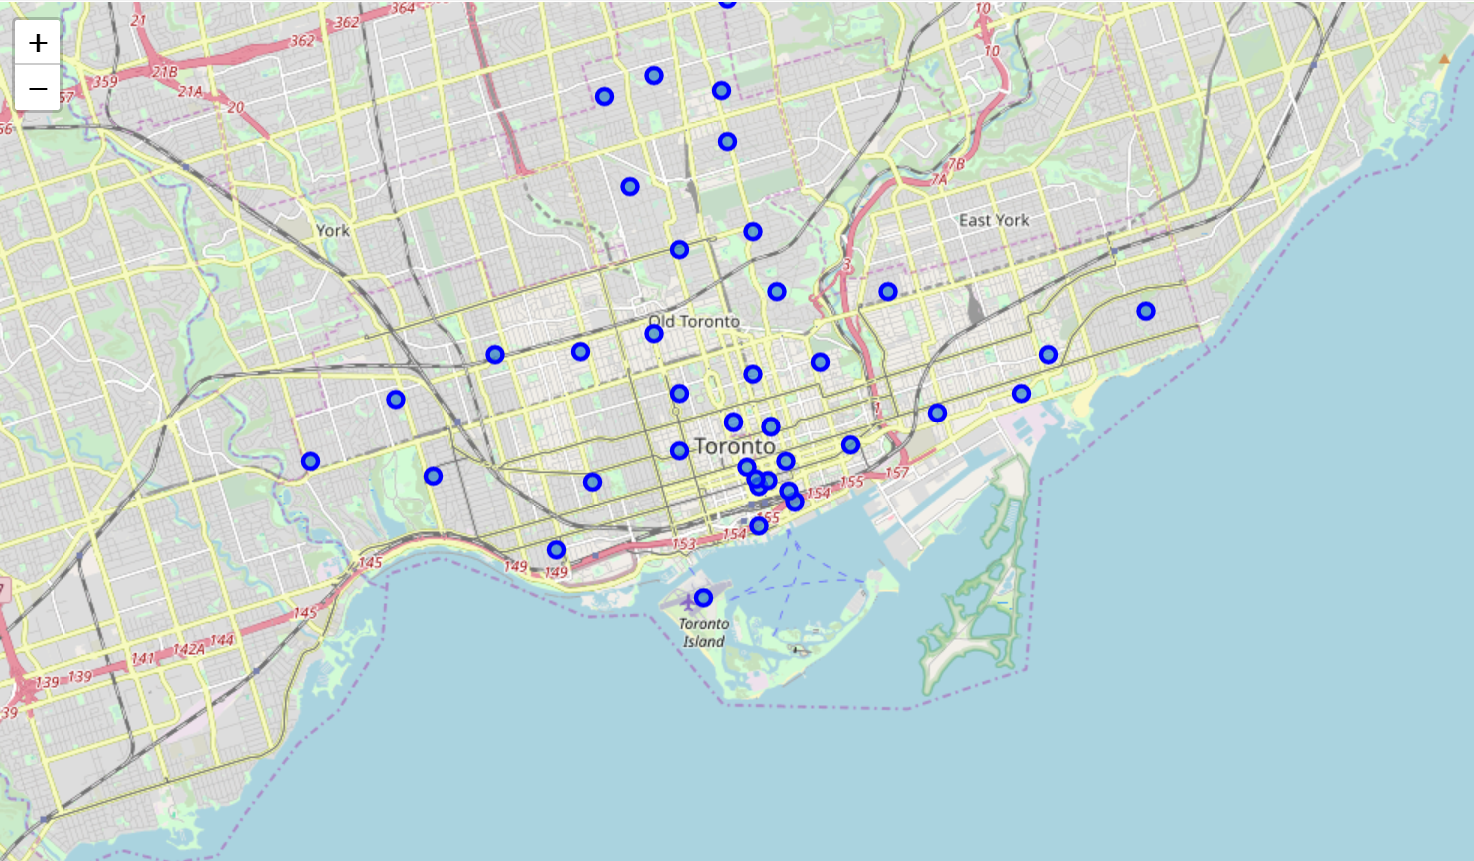

In [ ]:
#here I had the login info to access foursquare which I removed after finishing the project.

In [9]:
#Now to create the function to get the list of venues for our selected locations
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
#now we can use the above function to create a venue list for Toronto
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

Let's get an idea of what the new dataframe looks like:

In [12]:
print(toronto_venues.shape)
toronto_venues.head()

(1693, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Beaches              43.676357              -79.293031   
1  The Beaches              43.676357              -79.293031   
2  The Beaches              43.676357              -79.293031   
3  The Beaches              43.676357              -79.293031   
4  The Beaches              43.676357              -79.293031   

                                Venue  Venue Latitude  Venue Longitude  \
0                   Glen Manor Ravine       43.676821       -79.293942   
1  The Big Carrot Natural Food Market       43.678879       -79.297734   
2                 Grover Pub and Grub       43.679181       -79.297215   
3                 Glen Stewart Ravine       43.676300       -79.294784   
4                       Upper Beaches       43.680563       -79.292869   

         Venue Category  
0                 Trail  
1     Health Food Store  
2                   Pub  
3  Other Great Outdoors  
4          Neighborhood

Next we will go ahead and create one hot encoding to determine frequency of each venue type within each neighborhood

In [24]:
#fix for display issues with dataframe
from IPython.display import display
pd.set_option('display.max_columns', None)

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
cols = list(toronto_onehot)
cols.insert(0, cols.pop(cols.index('Neighborhood')))
toronto_onehot = toronto_onehot.loc[:, cols]

print(toronto_onehot.shape)
toronto_onehot.head()

(1693, 232)


Neighborhood  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0  The Beaches                  0        0                   0             0   
1  The Beaches                  0        0                   0             0   
2  The Beaches                  0        0                   0             0   
3  The Beaches                  0        0                   0             0   
4  The Beaches                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Argentinian Restaurant  Art Gallery  \
0             0         0                       0            0   
1             0         0                       0            0   
2             0         0                       0            0   
3             0         0                       0            0   
4             0         0                       0            0   

   Arts & Crafts Store  Asian Restaurant  Auto Workshop  BBQ Joint  \
0                    0                 0              0          0   
1                    0                 0              0          0   
2                    0                 0              0          0   
3                    0                 0              0          0   
4                    0                 0              0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  \
0           0           0       0     0    0                 0   
1           0           0       0     0    0                 0   
2           0           0       0     0    0                 0   
3           0           0       0     0    0                 0   
4           0           0       0     0    0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0       0              0          0         0   
1                   0       0              0          0         0   
2                   0       0              0          0         0   
3                   0       0              0          0         0   
4                   0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                     0               0        0                0         0   
1                     0               0        0                0         0   
2                     0               0        0                0         0   
3                     0               0        0                0         0   
4                     0               0        0                0         0   

   Burger Joint  Burrito Place  Bus Line  Butcher  Café  \
0             0              0         0        0     0   
1             0              0         0        0     0   
2             0              0         0        0     0   
3             0              0         0        0     0   
4             0              0         0        0     0   

   Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  Cheese Shop  \
0                          0            0                     0            0   
1          

Now we can group by the mean of the frequency of occurance for each venue type.

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Afghan Restaurant  \
0                            Adelaide, King, Richmond           0.000000   
1                                         Berczy Park           0.000000   
2        Brockton, Exhibition Place, Parkdale Village           0.000000   
3   Business Reply Mail Processing Centre 969 Eastern           0.000000   
4   CN Tower, Bathurst Quay, Island airport, Harbo...           0.000000   
5                         Cabbagetown, St. James Town           0.000000   
6                                  Central Bay Street           0.000000   
7           Chinatown, Grange Park, Kensington Market           0.000000   
8                                            Christie           0.000000   
9                                Church and Wellesley           0.011765   
10                     Commerce Court, Victoria Hotel           0.000000   
11                                         Davisville           0.000000   
12                                   Davisville North           0.000000   
13  Deer Park, Forest Hill SE, Rathnelly, South Hi...           0.000000   
14           Design Exchange, Toronto Dominion Centre           0.000000   
15                       Dovercourt Village, Dufferin           0.000000   
16             First Canadian Place, Underground city           0.000000   
17                Forest Hill North, Forest Hill West           0.000000   
18                     Harbord, University of Toronto           0.000000   
19                                       Harbourfront           0.000000   
20  Harbourfront East, Toronto Islands, Union Station           0.000000   
21                      High Park, The Junction South           0.000000   
22                                      Lawrence Park           0.000000   
23                           Little Portugal, Trinity           0.000000   
24                        Moore Park, Summerhill East           0.000000   
25                                 North Toronto West           0.000000   
26                             Parkdale, Roncesvalles           0.000000   
27                                           Rosedale           0.000000   
28                                           Roselawn           0.000000   
29                                 Runnymede, Swansea           0.000000   
30                           Ryerson, Garden District           0.000000   
31                                     St. James Town           0.000000   
32                    Stn A PO Boxes 25 The Esplanade           0.000000   
33                                    Studio District           0.000000   
34                The Annex, North Midtown, Yorkville           0.000000   
35                                        The Beaches           0.000000   
36                     The Beaches West, India Bazaar           0.000000   
37                       The Danforth West, Riverdale           0.000000   

    Airport  Airport Food Court  Airport Gate  Airport Lounge  \
0    0.0000              0.0000        0.0000           0.000   
1    0.0000              0.0000        0.0000           0.000   
2    0.0000              0.0000        0.0000           0.000   
3    0.0000              0.0000        0.0000           0.000   
4    0.0625              0.0625        0.0625           0.125   
5    0.0000              0.0000        0.0000           0.000   
6    0.0000              0.0000        0.0000           0.000   
7    0.0000              0.0000        0.0000           0.000   
8    0.0000              0.0000        0.0000           0.000   
9    0.0000              0.0000        0.0000           0.000   
10   0.0000              0.0000        0.0000           0.000   
11   0.0000              0.0000        0.0000           0.000   
12   0.0000              0.0000        0.0000           0.000   
13   0.0000              0.0000        0.0000           0.000   
14   0.0000              0.0000        0.0000           0.000   
15   0.0000              0.0000     

Create new dataframe with listing of the top 10 categories for each neighborhood

In [29]:
import numpy as np #forgot this one earlier

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond           Coffee Shop   
1                                        Berczy Park           Coffee Shop   
2       Brockton, Exhibition Place, Parkdale Village           Coffee Shop   
3  Business Reply Mail Processing Centre 969 Eastern    Light Rail Station   
4  CN Tower, Bathurst Quay, Island airport, Harbo...       Airport Service   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café       Thai Restaurant                   Bar   
1                Bakery              Beer Bar            Steakhouse   
2                  Café        Breakfast Spot  Gym / Fitness Center   
3           Yoga Studio                   Spa  Gym / Fitness Center   
4        Airport Lounge              Boutique       Harbor / Marina   

  5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0            Steakhouse         Cosmetics Shop        Breakfast Spot   
1          Cocktail Bar     Seafood Restaurant           Cheese Shop   
2          Intersection  Performing Arts Venue             Pet Store   
3         Garden Center                 Garden  Fast Food Restaurant   
4                   Bar            Coffee Shop         Boat or Ferry   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0            Restaurant                 Hotel           Burger Joint  
1                  Café        Farmers Market              Jazz Club  
2                   Gym          Climbing Gym             Restaurant  
3        Farmers Market            Comic Shop                   Park  
4      Sculpture Garden                 Plane       Airport Terminal

Now to create our cluster groups using K Means clustering.

In [26]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now lets combine the previous 2 products into one dataframe

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head()



Postcode          Borough                   Neighbourhood   Latitude  \
0      M4E     East Toronto                     The Beaches  43.676357   
1      M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2      M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
3      M4M     East Toronto                 Studio District  43.659526   
4      M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.293031               0     Health Food Store                   Pub   
1 -79.352188               0      Greek Restaurant           Coffee Shop   
2 -79.315572               0                  Park         Burrito Place   
3 -79.340923               0                  Café           Coffee Shop   
4 -79.388790               4                  Park           Swim School   

  3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0  Other Great Outdoors                 Trail                   Diner   
1        Ice Cream Shop    Italian Restaurant  Furniture / Home Store   
2      Sushi Restaurant               Brewery              Steakhouse   
3           Yoga Studio    Italian Restaurant     American Restaurant   
4              Bus Line           Yoga Studio          Discount Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Farmers Market    Falafel Restaurant           Event Space   
1            Restaurant           Yoga Studio               Brewery   
2        Ice Cream Shop         Movie Theater        Sandwich Place   
3                Bakery                 Diner        Clothing Store   
4        Farmers Market    Falafel Restaurant           Event Space   

     9th Most Common Venue     10th Most Common Venue  
0     Ethiopian Restaurant          Electronics Store  
1          Bubble Tea Shop       Caribbean Restaurant  
2                      Pub         Italian Restaurant  
3  Comfort Food Restaurant  Middle Eastern Restaurant  
4     Ethiopian Restaurant          Electronics Store

Now to visualize the clusters on a map

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

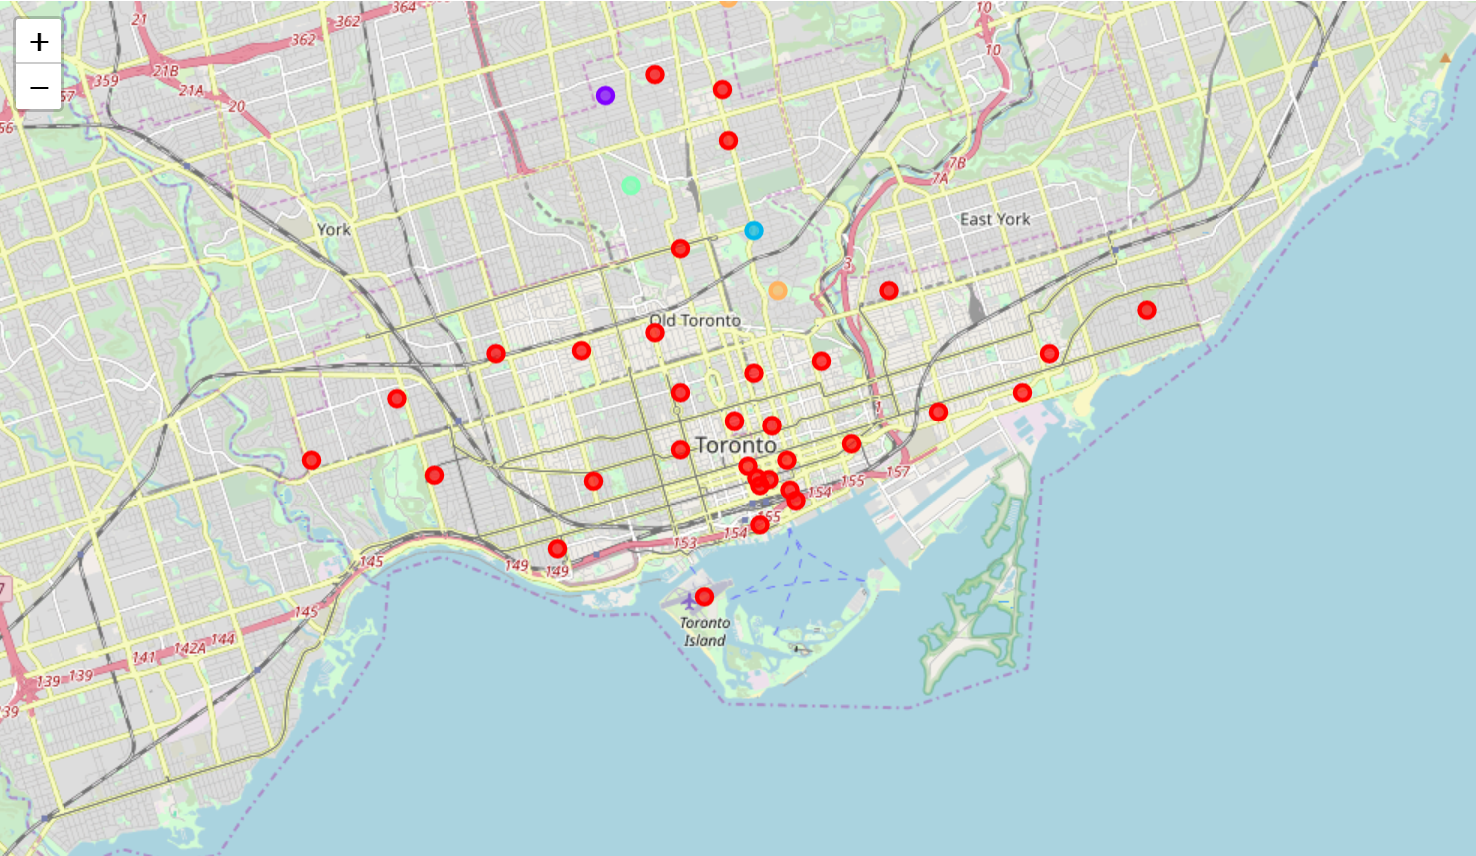

Judging by the above map it looks like there are different types of venues in the norther part of toronto than what you would see further south, closer to the coast.